# ResNet18 on CIFAR10
---

1) Extracted Resnet18 model and added it to [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

2) Used data loader, model loading, train, and test code to train ResNet18 on Cifar10

3) Best Test Accuracy = 90.12%, Final Test accuracy = 90.12%, number of epochs = 50. 

4) Used image augmentation

[Link to Google Colab Code File](https://colab.research.google.com/drive/1V86eiHb4kYyAPOXaMpquM9BjGhDDBXtC)

[Link to python helper files](https://github.com/genigarus/EVA4/tree/master/API)

## Google Drive Connection

In [1]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [3]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


# Imports

In [4]:
from __future__ import print_function
import math
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
import matplotlib.pyplot as plt

!pip install torchsummary
from torchsummary import summary

# Model

In [0]:
from models import *

# Training Code


In [0]:
from training_testing import train

# Testing Code

In [0]:
from training_testing import test

# Regularization

In [0]:
from regularization import *

# Dataloader/Transformations/Image-augmentations


In [0]:
from data_loader import generate_train_test_loader

# Misc Items like finding misclassified images

In [0]:
from utility import *
from grad_cam import *

# Execution(Run models for 50 epochs)

In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session9"

## Generating Data Loaders

In [12]:
SEED = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
DATA_PATH = PATH+'/data'
need_albumentation = True
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

train_loader, test_loader, test_data = generate_train_test_loader(DATA_PATH, SEED, means, stdevs, need_albumentation)

Files already downloaded and verified
Files already downloaded and verified


airplane   dog  deer  deer


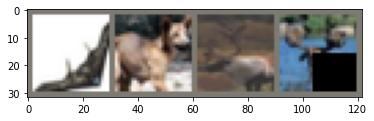

In [0]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % CIFAR10_CLASS_LABELS[labels[j]] for j in range(4)))

  0%|          | 0/391 [00:00<?, ?it/s]

**************************************************
********** With Resnet18 model **********
**************************************************

 Initializing...
Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1

Loss=2.240297555923462 Batch_id=390 Accuracy=43.63: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5364/10000 (53.64%)

EPOCH: 2


Loss=2.024574041366577 Batch_id=390 Accuracy=60.52: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6305/10000 (63.05%)

EPOCH: 3


Loss=1.7801933288574219 Batch_id=390 Accuracy=68.05: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6728/10000 (67.28%)

EPOCH: 4


Loss=1.3777707815170288 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7199/10000 (71.99%)

EPOCH: 5


Loss=1.8897955417633057 Batch_id=390 Accuracy=75.16: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7582/10000 (75.82%)

EPOCH: 6


Loss=1.2664141654968262 Batch_id=390 Accuracy=77.12: 100%|██████████| 391/391 [00:29<00:00, 13.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7948/10000 (79.48%)

EPOCH: 7


Loss=1.3595101833343506 Batch_id=390 Accuracy=79.16: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8053/10000 (80.53%)

EPOCH: 8


Loss=1.2463514804840088 Batch_id=390 Accuracy=79.77: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7897/10000 (78.97%)

EPOCH: 9


Loss=1.0549368858337402 Batch_id=390 Accuracy=81.11: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8138/10000 (81.38%)

EPOCH: 10


Loss=1.0486729145050049 Batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [00:29<00:00, 13.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8133/10000 (81.33%)

EPOCH: 11


Loss=1.3419699668884277 Batch_id=390 Accuracy=82.52: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8443/10000 (84.43%)

EPOCH: 12


Loss=1.0554581880569458 Batch_id=390 Accuracy=83.38: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8092/10000 (80.92%)

EPOCH: 13


Loss=1.0239611864089966 Batch_id=390 Accuracy=83.84: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8491/10000 (84.91%)

EPOCH: 14


Loss=0.9598211646080017 Batch_id=390 Accuracy=84.33: 100%|██████████| 391/391 [00:29<00:00, 13.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8336/10000 (83.36%)

EPOCH: 15


Loss=0.8664215207099915 Batch_id=390 Accuracy=84.82: 100%|██████████| 391/391 [00:29<00:00, 13.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8632/10000 (86.32%)

EPOCH: 16


Loss=0.9216904640197754 Batch_id=390 Accuracy=85.12: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8369/10000 (83.69%)

EPOCH: 17


Loss=0.7386261224746704 Batch_id=390 Accuracy=85.53: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8399/10000 (83.99%)

EPOCH: 18


Loss=0.8281561732292175 Batch_id=390 Accuracy=85.85: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8130/10000 (81.30%)

EPOCH: 19


Loss=0.78228759765625 Batch_id=390 Accuracy=86.00: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8255/10000 (82.55%)

EPOCH: 20


Loss=0.79493248462677 Batch_id=390 Accuracy=86.60: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8740/10000 (87.40%)

EPOCH: 21


Loss=1.0163177251815796 Batch_id=390 Accuracy=86.71: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8526/10000 (85.26%)

EPOCH: 22


Loss=0.7099301815032959 Batch_id=390 Accuracy=86.88: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7976/10000 (79.76%)

EPOCH: 23


Loss=0.7548961639404297 Batch_id=390 Accuracy=87.21: 100%|██████████| 391/391 [00:29<00:00, 13.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8748/10000 (87.48%)

EPOCH: 24


Loss=0.6949806213378906 Batch_id=390 Accuracy=87.47: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8840/10000 (88.40%)

EPOCH: 25


Loss=0.9070874452590942 Batch_id=390 Accuracy=87.43: 100%|██████████| 391/391 [00:29<00:00, 13.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8646/10000 (86.46%)

EPOCH: 26


Loss=0.7989834547042847 Batch_id=390 Accuracy=87.74: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8607/10000 (86.07%)

EPOCH: 27


Loss=0.6568781137466431 Batch_id=390 Accuracy=87.74: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8811/10000 (88.11%)

EPOCH: 28


Loss=0.7615796327590942 Batch_id=390 Accuracy=88.06: 100%|██████████| 391/391 [00:29<00:00, 13.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8564/10000 (85.64%)

EPOCH: 29


Loss=0.667597770690918 Batch_id=390 Accuracy=88.28: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8657/10000 (86.57%)

EPOCH: 30


Loss=0.5693109035491943 Batch_id=390 Accuracy=88.48: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8577/10000 (85.77%)

EPOCH: 31


Loss=0.6280015707015991 Batch_id=390 Accuracy=88.31: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8861/10000 (88.61%)

EPOCH: 32


Loss=0.7591877579689026 Batch_id=390 Accuracy=88.84: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8803/10000 (88.03%)

EPOCH: 33


Loss=0.7686699628829956 Batch_id=390 Accuracy=88.76: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8737/10000 (87.37%)

EPOCH: 34


Loss=0.5987282395362854 Batch_id=390 Accuracy=88.96: 100%|██████████| 391/391 [00:29<00:00, 13.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8823/10000 (88.23%)

EPOCH: 35


Loss=0.5087502002716064 Batch_id=390 Accuracy=89.04: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8754/10000 (87.54%)

EPOCH: 36


Loss=0.49988454580307007 Batch_id=390 Accuracy=88.94: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8370/10000 (83.70%)

EPOCH: 37


Loss=0.5706955194473267 Batch_id=390 Accuracy=89.51: 100%|██████████| 391/391 [00:29<00:00, 13.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8786/10000 (87.86%)

EPOCH: 38


Loss=0.6397384405136108 Batch_id=390 Accuracy=89.65: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8741/10000 (87.41%)

EPOCH: 39


Loss=0.5983268022537231 Batch_id=390 Accuracy=89.60: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8836/10000 (88.36%)

EPOCH: 40


Loss=0.6138373017311096 Batch_id=390 Accuracy=89.73: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8736/10000 (87.36%)

EPOCH: 41


Loss=0.6629371643066406 Batch_id=390 Accuracy=89.87: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8842/10000 (88.42%)

EPOCH: 42


Loss=0.6174063086509705 Batch_id=390 Accuracy=90.07: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8955/10000 (89.55%)

EPOCH: 43


Loss=0.4873083233833313 Batch_id=390 Accuracy=90.03: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8757/10000 (87.57%)

EPOCH: 44


Loss=0.45534372329711914 Batch_id=390 Accuracy=90.15: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8986/10000 (89.86%)

EPOCH: 45


Loss=0.5704448223114014 Batch_id=390 Accuracy=90.13: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8707/10000 (87.07%)

EPOCH: 46


Loss=0.6538402438163757 Batch_id=390 Accuracy=90.51: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8644/10000 (86.44%)

EPOCH: 47


Loss=0.6220229268074036 Batch_id=390 Accuracy=90.33: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8899/10000 (88.99%)

EPOCH: 48


Loss=0.39931851625442505 Batch_id=390 Accuracy=90.57: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8956/10000 (89.56%)

EPOCH: 49


Loss=0.6620641946792603 Batch_id=390 Accuracy=90.49: 100%|██████████| 391/391 [00:29<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8976/10000 (89.76%)

EPOCH: 50


Loss=0.5067469477653503 Batch_id=390 Accuracy=90.67: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]



Test set: Average loss: 0.0025, Accuracy: 9012/10000 (90.12%)


 Saving trained model...

 Visualizing:


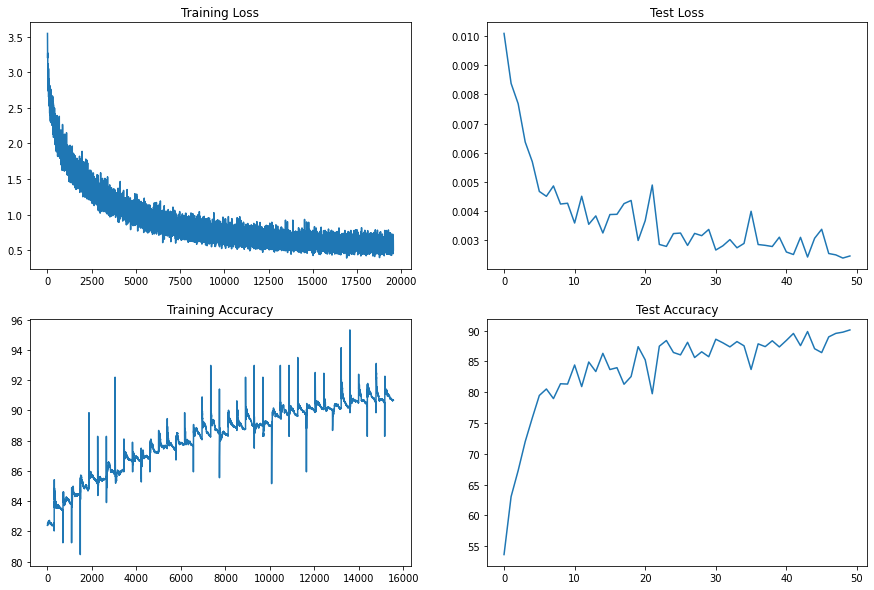

In [0]:
print("*"*50)
print("*"*10,"With Resnet18 model","*"*10)
print("*"*50)
print("\n Initializing...")
aug_l1_l2_reg_train_losses = []
aug_l1_l2_reg_test_losses = []
aug_l1_l2_reg_train_acc = []
aug_l1_l2_reg_test_acc = []
# dropout_value = 0.2
LAMBDA1=1e-5
LR=0.01
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
inp_size = (3, 32, 32)
device = set_device()

print("Creating model...")
aug_l1_l2_model =  ResNet18().to(device)

print("\n Model Summary:")
summary(aug_l1_l2_model, input_size=inp_size)
optimizer = optim.SGD(aug_l1_l2_model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()

print("\n Training the model...")
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(aug_l1_l2_model, device, train_loader, optimizer, criterion, epoch, aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, l1=True, lambda1=LAMBDA1)
    test(aug_l1_l2_model, device, criterion, test_loader, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

print("\n Saving trained model...")
torch.save(aug_l1_l2_model.state_dict(), PATH+"/model/cifar10_aug_model_l1_l2.pth")

print("\n Visualizing:")
visualize_graph(aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

# Load Saved Model
---

In [13]:
inp_size = (3, 32, 32)
device = set_device()
model_path = PATH + "/model/cifar10_aug_model_l1_l2.pth"
aug_l1_l2_model =  ResNet18().to(device)
aug_l1_l2_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

# View Correctly Classified Images
---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


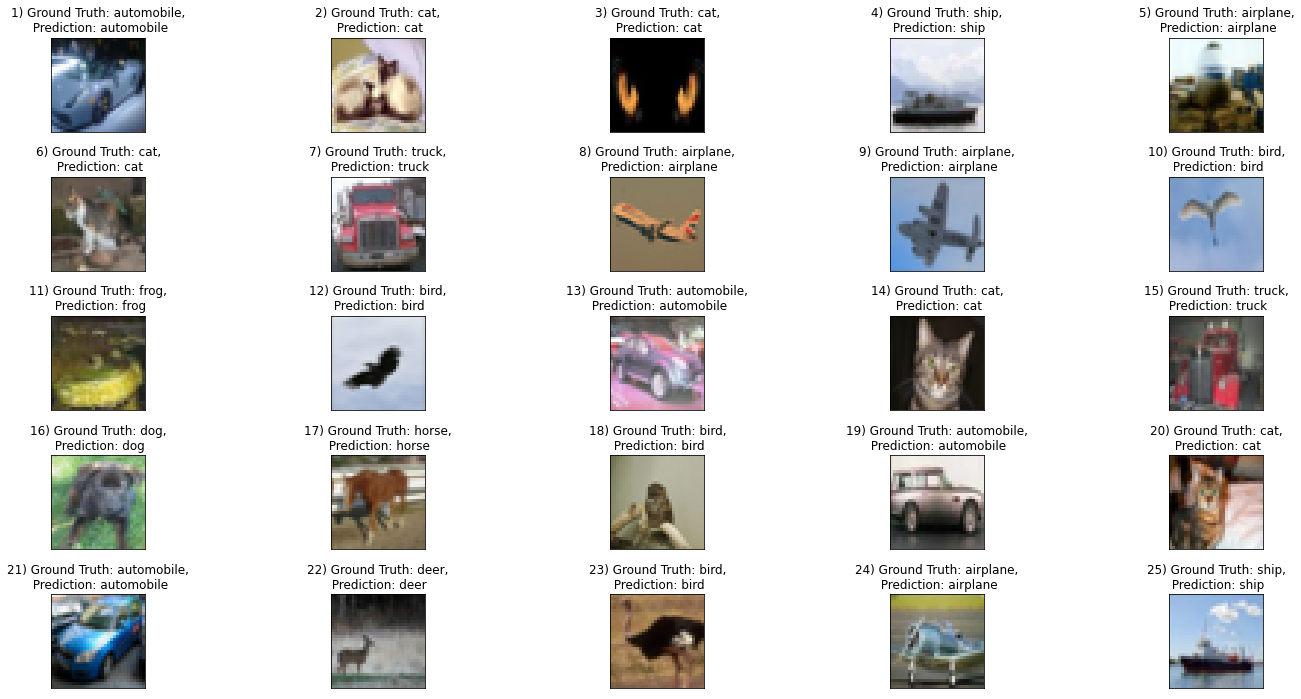

In [0]:
show_save_correctly_classified_images(aug_l1_l2_model, test_loader, device, PATH, name="misclassified_imgs", max_correctly_classified_images_imgs=25)

# View Incorrectly Classified Images
---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


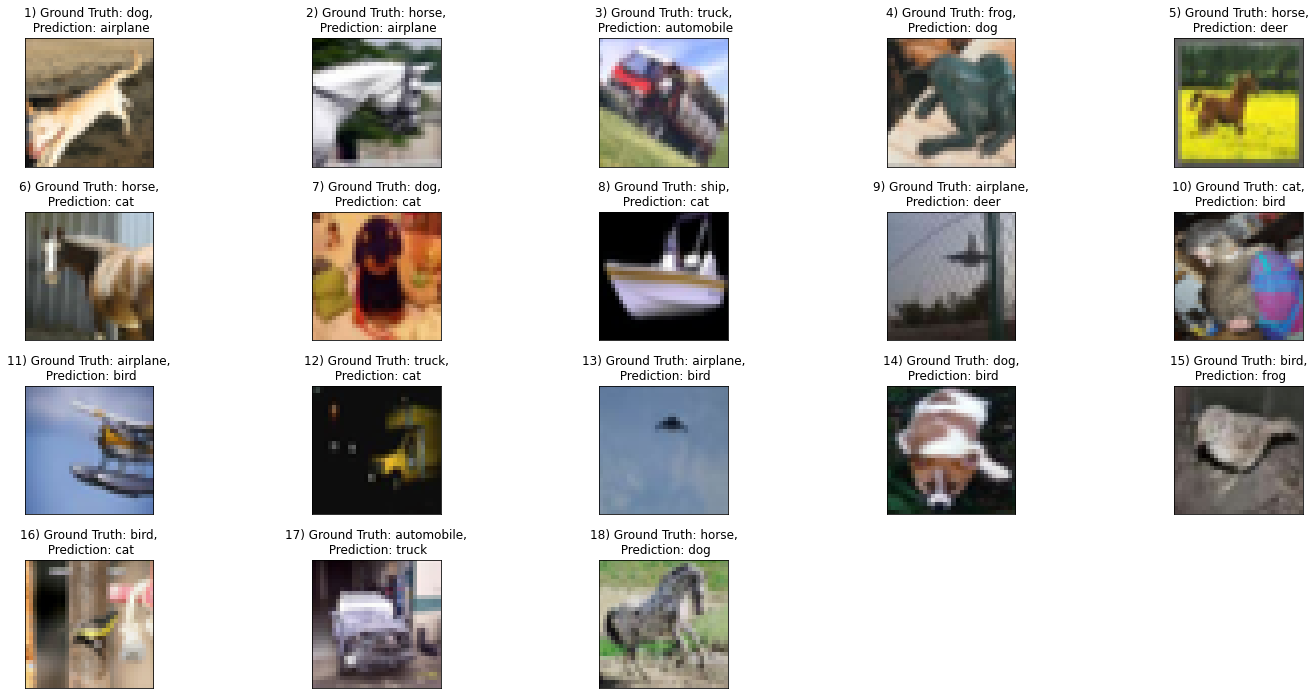

In [0]:
show_save_misclassified_images(aug_l1_l2_model, test_loader, device, PATH, name="misclassified_imgs", max_misclassified_imgs=25)

# GradCAM Visualization
---

### Fetching correctly and incorrectly classified images

In [0]:
misclassified_imgs, correctly_classified_images = classify_images(aug_l1_l2_model, test_loader, device, 5)

In [0]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(aug_l1_l2_model, CIFAR10_CLASS_LABELS, target_layers)

## For correctly classified images:-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

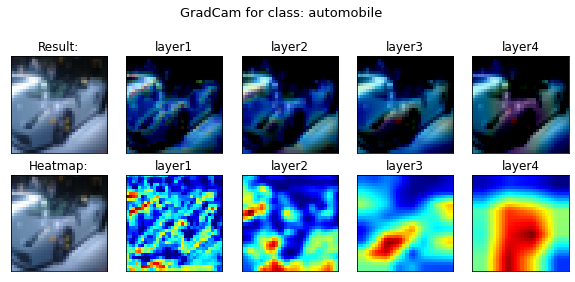

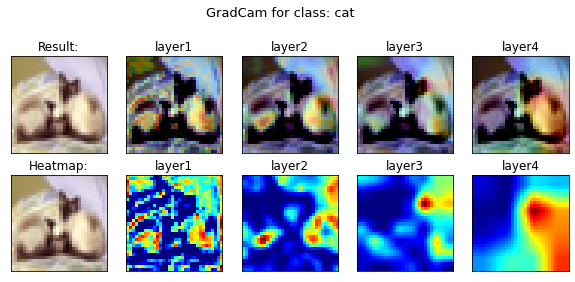

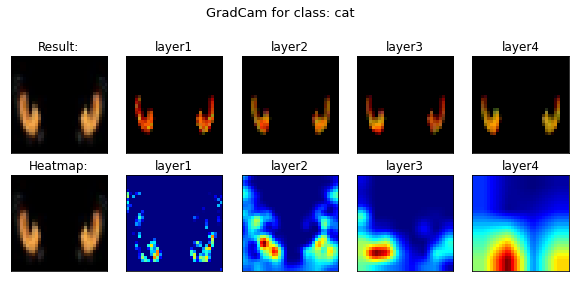

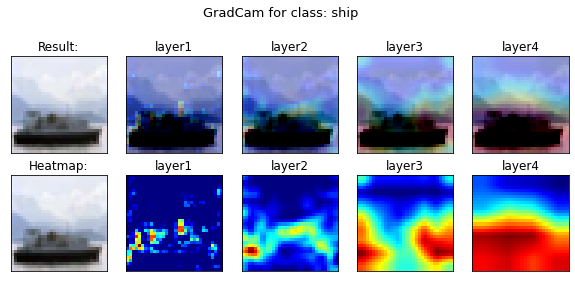

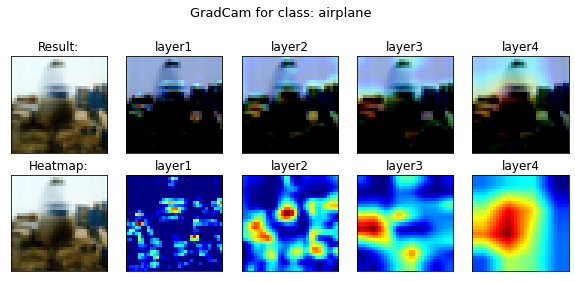

In [20]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, PATH, metric="correct")

## For misclassified images:-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

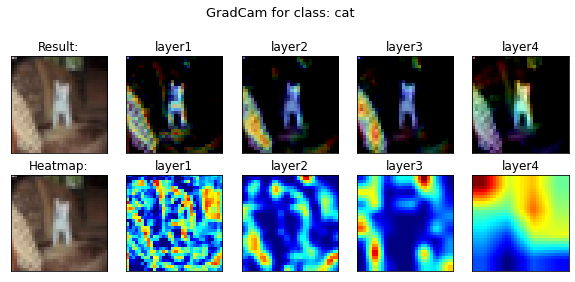

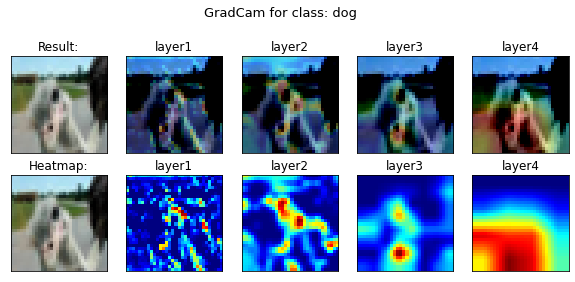

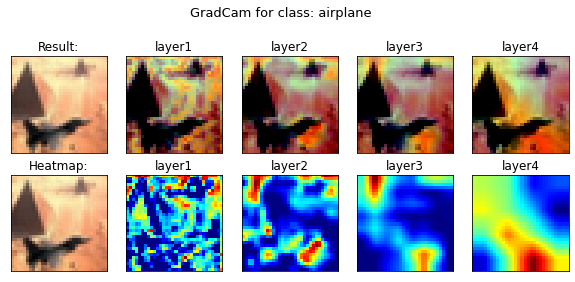

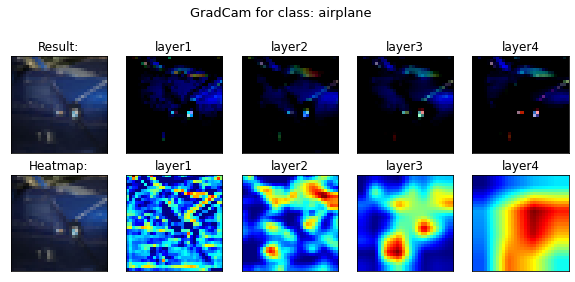

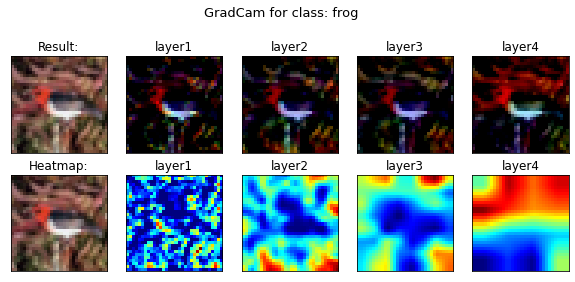

In [21]:
misclassified_pred_images = []
for i in range(len(misclassified_imgs)):
  misclassified_pred_images.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(misclassified_pred_images), target_layers, PATH, metric="correct")